In [1]:
import pandas as pd
import matplotlib.pyplot as plt
marathon_2015_2017 = pd.read_csv('./material/marathon_2015_2017.csv')

C:\Users\ysn65\anaconda3\envs\init_dn\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (21) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [2]:
runner_1860 = marathon_2015_2017[marathon_2015_2017.Age.isin(range(18,60))]
runner_1860_counting = runner_1860['Age'].value_counts()

In [4]:
runner_1860.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73608 entries, 0 to 79637
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Name           73608 non-null  object
 1   Age            73608 non-null  int64 
 2   M/F            73608 non-null  object
 3   City           73607 non-null  object
 4   State          65438 non-null  object
 5   Country        73608 non-null  object
 6   5K             73608 non-null  int64 
 7   10K            73608 non-null  int64 
 8   15K            73608 non-null  int64 
 9   20K            73608 non-null  int64 
 10  Half           73608 non-null  int64 
 11  25K            73608 non-null  int64 
 12  30K            73608 non-null  int64 
 13  35K            73608 non-null  int64 
 14  40K            73608 non-null  int64 
 15  Pace           73608 non-null  int64 
 16  Official Time  73608 non-null  int64 
 17  Overall        73608 non-null  int64 
 18  Gender         73608 non-n

In [3]:
runner_1860_counting

45    3236
46    3039
40    2734
47    2566
50    2498
41    2494
35    2327
42    2318
48    2277
43    2265
36    2188
38    2128
51    2124
37    2108
39    2101
44    2056
49    2018
52    1930
55    1920
29    1906
30    1849
33    1834
31    1779
28    1758
34    1756
27    1755
53    1730
32    1726
26    1709
25    1539
56    1514
54    1433
24    1301
57    1287
58    1044
23     920
59     788
22     701
21     489
20     264
19     137
18      62
Name: Age, dtype: int64

In [5]:
x= runner_1860_counting.index
# Convert x values to String in order to avoid int sorting
x = [str(i) for i in x]
y = runner_1860_counting.values
ratio = y / y.sum()
ratio_sum = ratio.cumsum()

<ipython-input-11-c264b25d230d>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  lineChart.set_yticklabels(['{:,.1%}'.format(x) for x  in ranges])


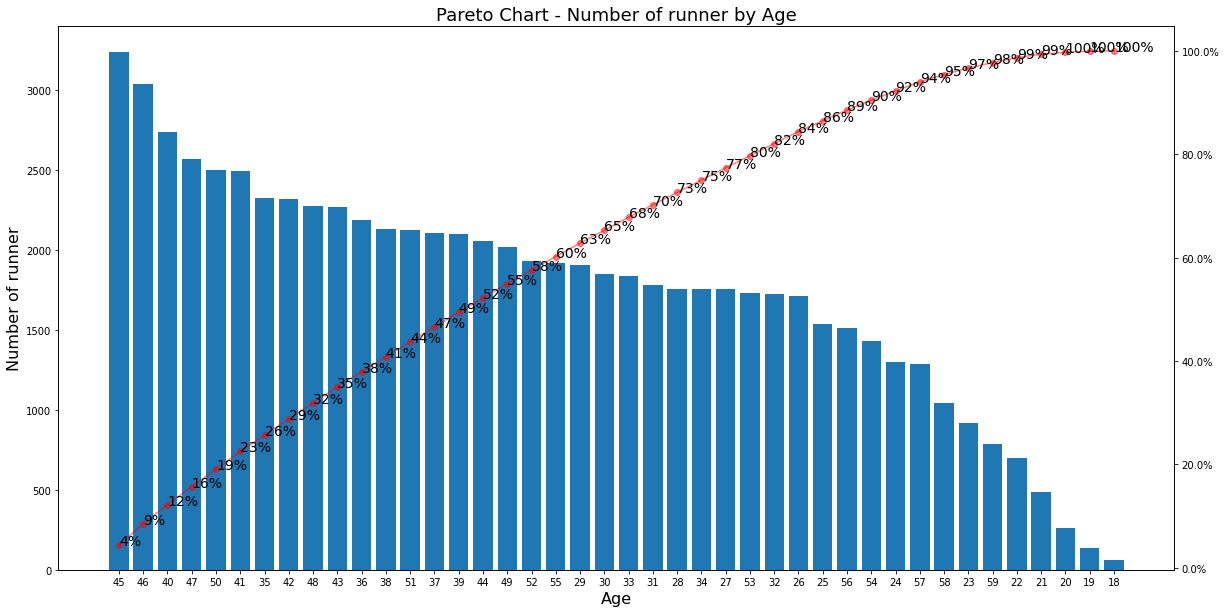

In [11]:
fig, barChart = plt.subplots(figsize=(20,10))
barChart.bar(x,y)
lineChart = barChart.twinx()
lineChart.plot(x, ratio_sum, '-ro', alpha=0.5)

ranges = lineChart.get_yticks()
lineChart.set_yticklabels(['{:,.1%}'.format(x) for x  in ranges])
ratio_sum_percentages = ['{0:.0%}'.format(x) for x in ratio_sum]
for i, txt in enumerate(ratio_sum_percentages):
    lineChart.annotate(txt, (x[i], ratio_sum[i]), fontsize=14)
    
barChart.set_xlabel('Age', fontdict = {'size':16})
barChart.set_ylabel('Number of runner', fontdict = {'size':16})
plt.title('Pareto Chart - Number of runner by Age', fontsize=18)
plt.show()